In [1]:
import scanpy as sc
import scipy.spatial
import squidpy


import pandas as pd
import numpy as np

import os

/Users/zafer.kosar/miniconda3/envs/sc/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 7.0.1. Please consider upgrading.
  warnings.warn(


In [12]:
sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=120, facecolor="white", frameon=False)

In [4]:
adata = sc.read(
    filename="s4d8_feature_selection.h5ad",
    backup_url="https://figshare.com/ndownloader/files/40016014",
)

100%|██████████| 4.18G/4.18G [12:01<00:00, 6.23MB/s]


In [5]:
adata.X = adata.layers["log1p_norm"]

In [6]:
adata.X

<14814x20171 sparse matrix of type '<class 'numpy.float64'>'
	with 16261538 stored elements in Compressed Sparse Row format>

In [7]:
adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

/Users/zafer.kosar/miniconda3/envs/sc/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [9]:
sc.pl.scatter(adata, color='total_counts')

ValueError: Either provide a `basis` or `x` and `y`.

In [10]:
sc.tl.tsne(adata, use_rep="X_pca")

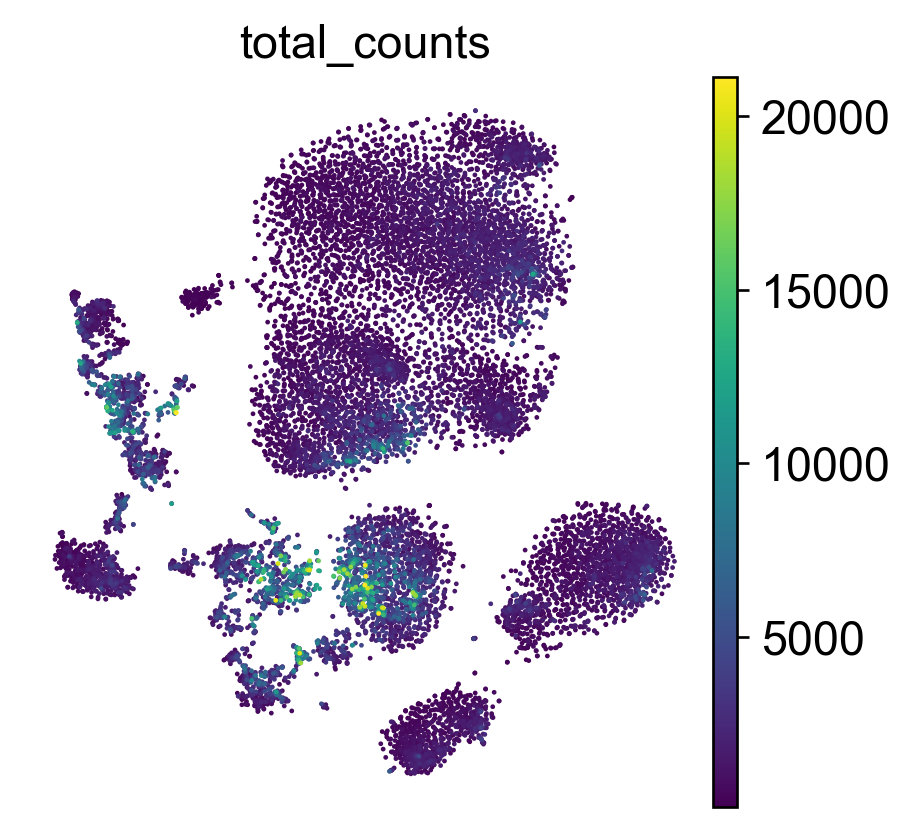

In [13]:
sc.pl.tsne(adata, color="total_counts")

In [14]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/zafer.kosar/miniconda3/envs/sc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


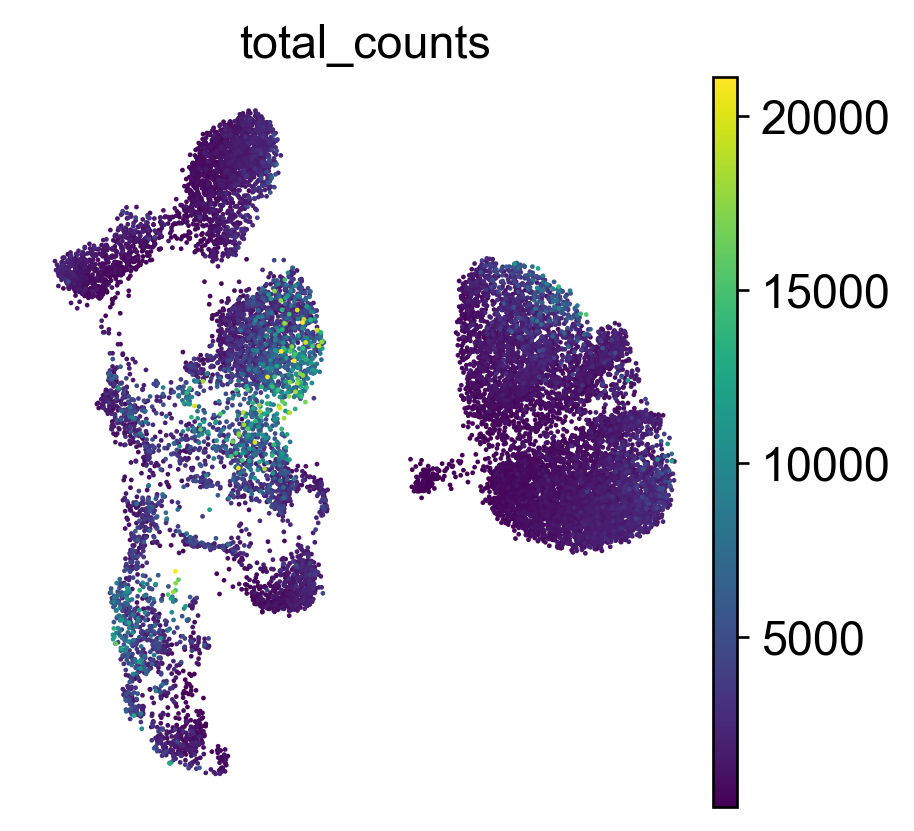

In [15]:
sc.pl.umap(adata, color="total_counts")

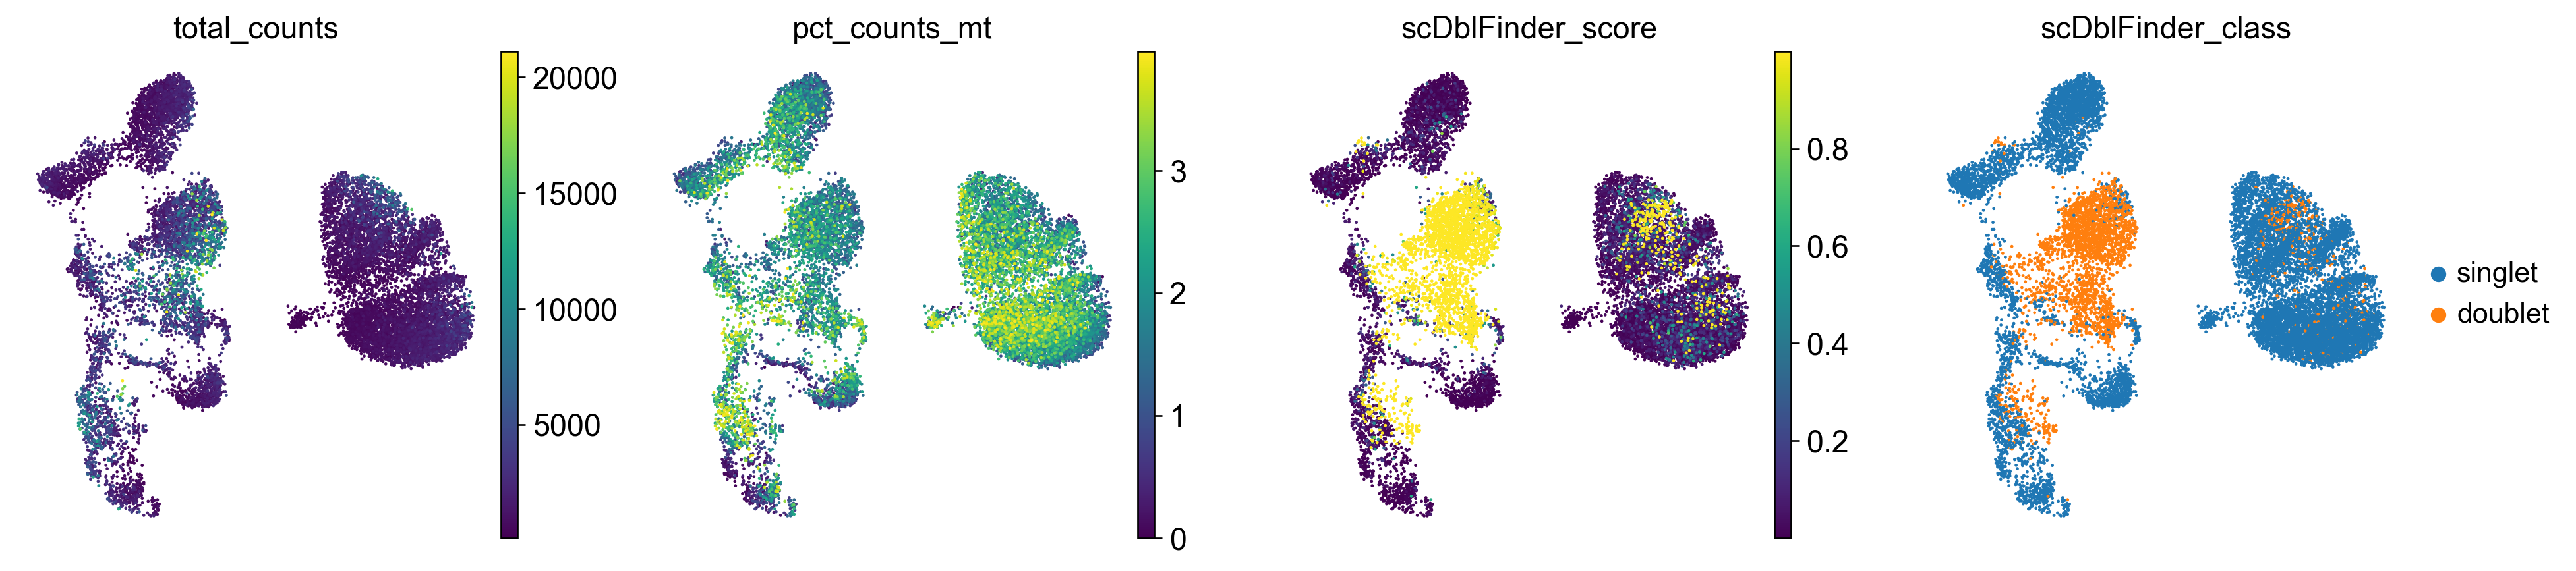

In [16]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt", "scDblFinder_score", "scDblFinder_class"],
)

In [17]:
adata.write("s4d8_dimensionality_reduction.h5ad")